
## Assignment 4
#### Author: Batuhan Ozcomlekci


The mode locking equations are described as the following in the homework and in the paper respectively:

$$
T_{\mathrm{R}} \frac{\partial u}{\partial T}=(g-l) u+\left(D_{g}-i D_{d}\right) \frac{\partial^{2} u}{\partial \tau^{2}}+(\kappa+i \delta)|u|^{2} u
$$

$$
\begin{aligned}
T_{R} \frac{\partial}{\partial T} a=&(g-\ell) a+\left(\frac{1}{\Omega_{f}^{2}}+j D\right) \frac{\partial^{2}}{\partial t^{2}} a +\left(\gamma^{2}-j \delta\right)|a|^{2} a .
\end{aligned}
$$

Thus,
$$u = a$$ 
$$\frac{1}{\Omega_{f}^{2}}=D_g$$
$$D=D_d$$
$$\gamma^{2}=\kappa$$
$$\tau = t$$

and the rest of the symbols are the same.

The split step Fourier transform will be applied to:

$$
\hat{N} \equiv(\kappa+i \delta)|u|^{2} u = Nu
$$

$$
\hat{D} \equiv(g-l) u+\left(D_{g}-i D_{d}\right) \frac{\partial^{2} u}{\partial \tau^{2}} = Du
$$


$$
T_{\mathrm{R}} \frac{\partial u}{\partial T}=\hat{D} + \hat{N}
$$

Initially, neglecting the contribution of $\mathcal{N}$. For this case the PDE is linear with no variable coefficients,
$$
\frac{\partial u}{\partial T}= \frac{\mathcal{D}}{T_R} u .
$$
Moreover, $D$ can be split into:
$$ \frac{\partial u}{\partial T} = \frac{\mathcal{D}}{T_R} u = \frac{\mathcal{L}}{T_R}u + \frac{(g-l)}{T_R} u $$
Isolating the second part of the equation, it can be handled by a forward step in time, in other words:

$$ \frac{\partial u}{\partial T} = \frac{(g-l)}{T_R} u, \int_{u(T,\tau)}^{u(T+\Delta t,\tau)}\frac{\partial u}{u}= \int_{T}^{T+\Delta t}\frac{(g-l)}{T_R}dT$$
$$ u(T+\Delta t, \tau)=e^{\frac{(g-l)}{T_R}\Delta t} u(T, \tau)$$ 


An analytical solution to the first part of this equation can be by taking the Fourier Transform
$$
\frac{\partial \hat{u}}{\partial T}=\frac{1}{T_R} \mathcal{F}(\mathcal{L} u)=\frac{D_g-iD_d}{T_R} \mathcal{F}\left(\frac{\partial^{2} u}{\partial \tau^{2}}\right)=- k^{2} \frac{D_g-iD_d}{T_R}\hat{u}.
$$
Here we use the following Fourier and Inverse Fourier Transform definitions
$$
\begin{aligned}
&\hat{h}(k)=\mathcal{F}(h)=\int_{-\infty}^{\infty} h(\tau) e^{-2 \pi i k \tau} d \tau \\
&h(\tau)=\mathcal{F}(\hat{h})=\int_{-\infty}^{\infty} \hat{h}(k) e^{2 \pi i k \tau} d k
\end{aligned}
$$
The partial derivatives are now gone and the equation becomes an ODE. The analytical solution can be computed and value of $\hat{u}( T+\Delta t, k)$ is given by

$$
\hat{u}(T+\Delta t, k)=\exp \left(-k^{2} \Delta t (D_g-iD_d)/T_R\right) \hat{u}(T, k)
$$

The solution in the $T$ domain can be calculated by the Inverse Fourier Transform:
$$
u( T+\Delta t, \tau)=\mathcal{F}^{-1}\left(\exp \left(-k^{2}  \Delta t(D_g-iD_d)/T_R\right) \hat{u}(T+\Delta t, k)\right)
$$

Also for the nonlinear part:

$$
\frac{\partial u}{\partial T}=\frac{\mathcal{N}}{T_R} u
$$

$$
u(T+\Delta t, \tau ) \approx \exp (\Delta t \mathcal{N}/T_R) u(T, \tau)
$$

Remember that, the step size is $\Delta t/2$ for the linear part and $\Delta t$ for the nonlinear part. Thus, adjust the equations accordingly for symmetric split step Fourier Method.

#### Equation 31 (Analytical Solution)

$$
u(t)=A_{o} \operatorname{sech}^{(1+j \beta)}\left(\frac{t}{\tau}\right) 
$$


Moreover:

$$
\beta=-\frac{D_{n} \gamma_{n}+\delta_{n}}{1+D_{n}^{2}} \frac{\tau}{\tau_{o}}
$$

In [1]:
###############################################################################
# Mode Locking of Lasers Simulation (Assignment 4)
# Author: Batuhan Ozcomlekci
###############################################################################
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift

In [3]:
#Parameters in the paper
D_n = -1
Omega_f = 3.141 #500 * 10**9
gamma_n = 2/3
delta_n = 2
g_0 = 1
g_sat = 0.33
E_sat = 10**(-12)
l = 0.4
E_0 = 2*10**(-12)

#Parameters in the homework
D_g = 1/Omega_f**2
T_R = 100
g = g_sat
D_d = -D_n
delta = delta_n
kappa = gamma_n**2

#Imaginary number
j = 1j
i = 1j

### Apply symmetrized split step Fourier Transform

In [38]:
delta_T = 0.01 #Time step
N_R = 100

#FFT parameters 
N = 500 # Num of Fourier modes
L = 100
h = L/N
n = np.array(range(-int(N/2),int(N/2)))
k = 2*n*np.pi/L

def u_uniform(x):
    fluct_mag = 1/5
    fluct = np.random.rand(len(x)) * fluct_mag
    return np.zeros(len(x)) + fluct

def u_t(x):
    A_0 = 1
    beta = -1#-(D_n*gamma_n+delta_n)/(1+D_n**2)*x
    return A_0*(1/np.cosh(x))**(1+beta*j)

def u_t_2(x):
    A_0 = 1
    beta = 0 # Chirp is removed
    return A_0*(1/np.cosh(x))**(1+beta*j)

def N_hat(u, dt):
    N = (kappa + 1j*delta) * np.abs(u)**2
    u = np.exp(dt*N/T_R)*u
    return u

def D_hat(u, dt):
    D = (D_g-1j*D_d)
    c = fftshift(fft(u))
    c = np.exp(-dt*k*k*D/T_R)*c
    u = ifft(fftshift(c))
    return np.exp((g-l)/T_R*dt)*u


x = n*h; # Grid points

def simulate( u ):
    u_list = []
    u_list.append(u)
    time = []; time.append(0)
    for n_r in range(1,N_R+1):
        for t in range(1,T_R+1):
            u = D_hat(u, delta_T/2)
            u = N_hat(u, delta_T)
            u = D_hat(u, delta_T/2)
            u_list.append(u.copy()) #Record the state of the system
            time += [t+(n_r-1)*T_R]
    return u_list, time

def simulate_further(u, iter=10000):
    for _ in range(iter):
        u = D_hat(u, delta_T/2)
        u = N_hat(u, delta_T)
        u = D_hat(u, delta_T/2)
    return u


In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np


def rand_color():
    return (np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand())

def plot_figure(u_list, time, limit=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    verts = []
    if limit:
        start = int(np.where(x==-10)[0])
        end = int(np.where(x==10)[0])
        for i,t in enumerate(time):
            u_val = u_list[i][start:end+1]
            verts.append(list(zip(x[start:end+1], np.abs(u_val)**2)))
    else:
        for i,t in enumerate(time):
            u_val = u_list[i]
            verts.append(list(zip(x, np.abs(u_val)**2)))

    face_colors = []
    for _ in time:
        face_colors += [rand_color()]
    poly = PolyCollection(verts, facecolors=face_colors)

    #poly = PolyCollection(verts)
    poly.set_alpha(0.7)
    ax.add_collection3d(poly, zs=time, zdir='y')

    ax.set_xlabel('t/Tau')
    ax.set_xlim3d(x[0], x[-1])
    ax.set_xlim3d(-10, 10)
    ax.set_ylabel('steps')
    ax.set_ylim3d(time[0], time[-1])
    ax.set_zlabel('Magnitude')
    ax.set_zlim3d(0, 5)

    fig.set_size_inches(10, 10)
    plt.show()

def plot_last(x, u):
    plt.figure()
    start = int(np.where(x==-10)[0])
    end = int(np.where(x==10)[0])
    u_val = u[start:end+1]
    x_val = x[start:end+1]
    plt.plot(x_val, np.abs(u_val)**2)
    plt.title('Last state')
    plt.xlabel('t/tau')
    plt.ylabel('$|u(x)|^2$')

/tmp/ipykernel_65398/3002888620.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


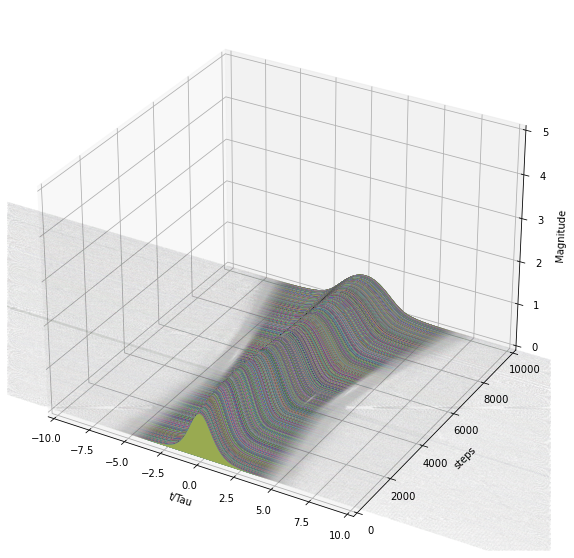

In [6]:
u = u_t(x) # Initial condition (Eqn 31)
u_list, time = simulate(u)
plot_figure(u_list, time)

/tmp/ipykernel_65398/3002888620.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


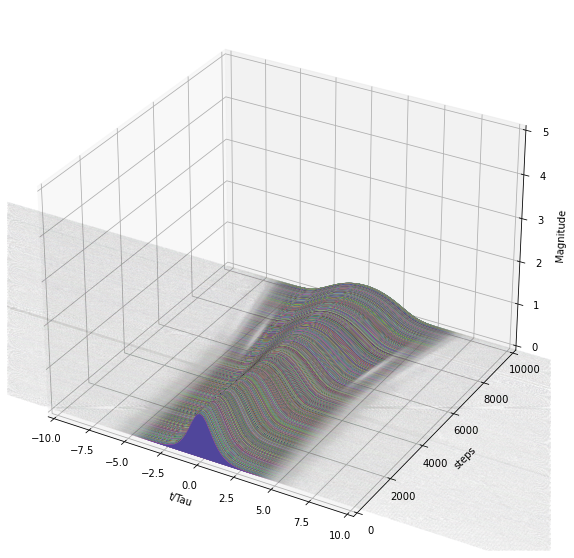

In [7]:
u = u_t_2(x) # Initial condition with chirp removed
u_list, time = simulate(u)
plot_figure(u_list, time)

/tmp/ipykernel_65398/3002888620.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


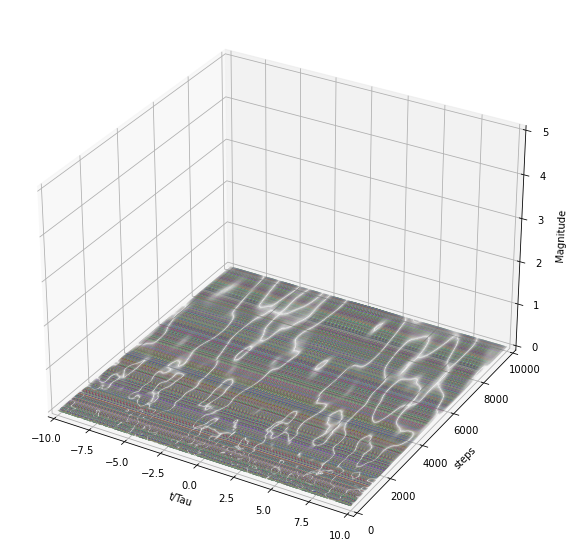

In [49]:
u = u_uniform(x) # Initial condition with fluctuation
u_list, time = simulate(u)
plot_figure(u_list, time, limit=True)

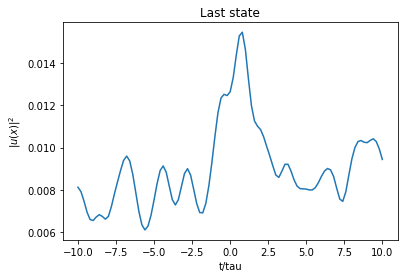

In [98]:
u = u_list[-1].copy()
simulate_further(u, iter=10000)
plot_last(x=x, u=u)

**Q1)** Starting with the pulse given in Equation (31) yields more stable results throughout 1000 iterations. In other words, the pulse preserves its shape over long iterations since Eqn. (31) the analytical solution of the equation. In order to reach the shortest pulse duration, I changed  $T_R, D_{g}, D_{s}, \delta, \text { and }, \kappa $ since they are the time to complete a full trip across the cavity, gain dispersion (filltering), group-velocity dispersion, self-phase modulation, and self-amplitude modulation respectively. The evolution can be seen in Figure 1.



**Q2)** When the chirp is removed from the pulse ($\beta=0$), the pulse evolved to disperse inside the cavity. When the pulse at the end of the 1000th (or more) roundtrips is compared with Eqn. (31), it is similar to the eqn 31 but this time (compared to the Q1 case) evolved and dispersed faster. Therefore, it is less similar than the case in Q1. Also when the chirp is removed small pulse bumps around the bigger bump is formed. The evolution can be seen in Figure 2

**Q3)**  In the last part, small fluctuations in the initial state gathered together to form pulses, however, these pulses are not significant as expected. Nevertheless, as it can observed in Figure 3 small perturbations to the inially uniform state led to several bigger pulses seen in the cavity.

/tmp/ipykernel_65398/3002888620.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


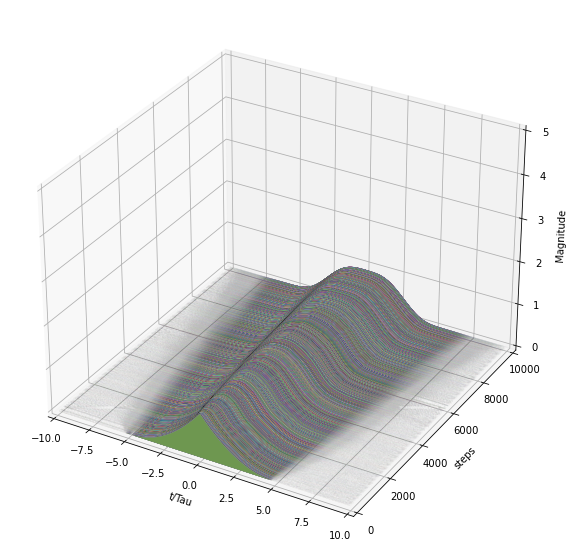

In [20]:
def u_tri(x):
    s = int(np.where(x==-5)[0])
    e = int(np.where(x==5)[0])
    pulse = np.zeros(len(x))
    pulse[s:e] = pulse[s:e]+ 1-np.abs(x[s:e])/np.max(x[s:e])
    return pulse


u = u_tri(x) # Initial condition with chirp removed
u_list, time = simulate(u)
plot_figure(u_list, time, limit=True)

As, an extra test, I tested what happens when the initial condition is a triangular pulse. It evolved to a pulse like the one described by the Eqn (31).

## References

[1] Suarez, Pablo. (2015). An introduction to the Split Step Fourier Method using MATLAB. 10.13140/RG.2.1.1394.0965. https://www.researchgate.net/publication/281441538_An_introduction_to_the_Split_Step_Fourier_Method_using_MATLAB

[2] H. A. Haus, "Mode-locking of lasers," in IEEE Journal of Selected Topics in Quantum Electronics, vol. 6, no. 6, pp. 1173-1185, Nov.-Dec. 2000, doi: 10.1109/2944.902165. https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=902165
